In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
from random import seed
seed(12)

In [57]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#'https://drive.google.com/open?id=1Sj1tjnsqz22y7xdhbU1AN3nOqPJ7uhPC'

In [3]:
wine = pd.read_csv('winequality-white.csv', sep = ';')

In [4]:
wine.columns 
wine.columns = wine.columns.str.replace(' ', '_')
print(wine.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Check for null values

In [6]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Visualization

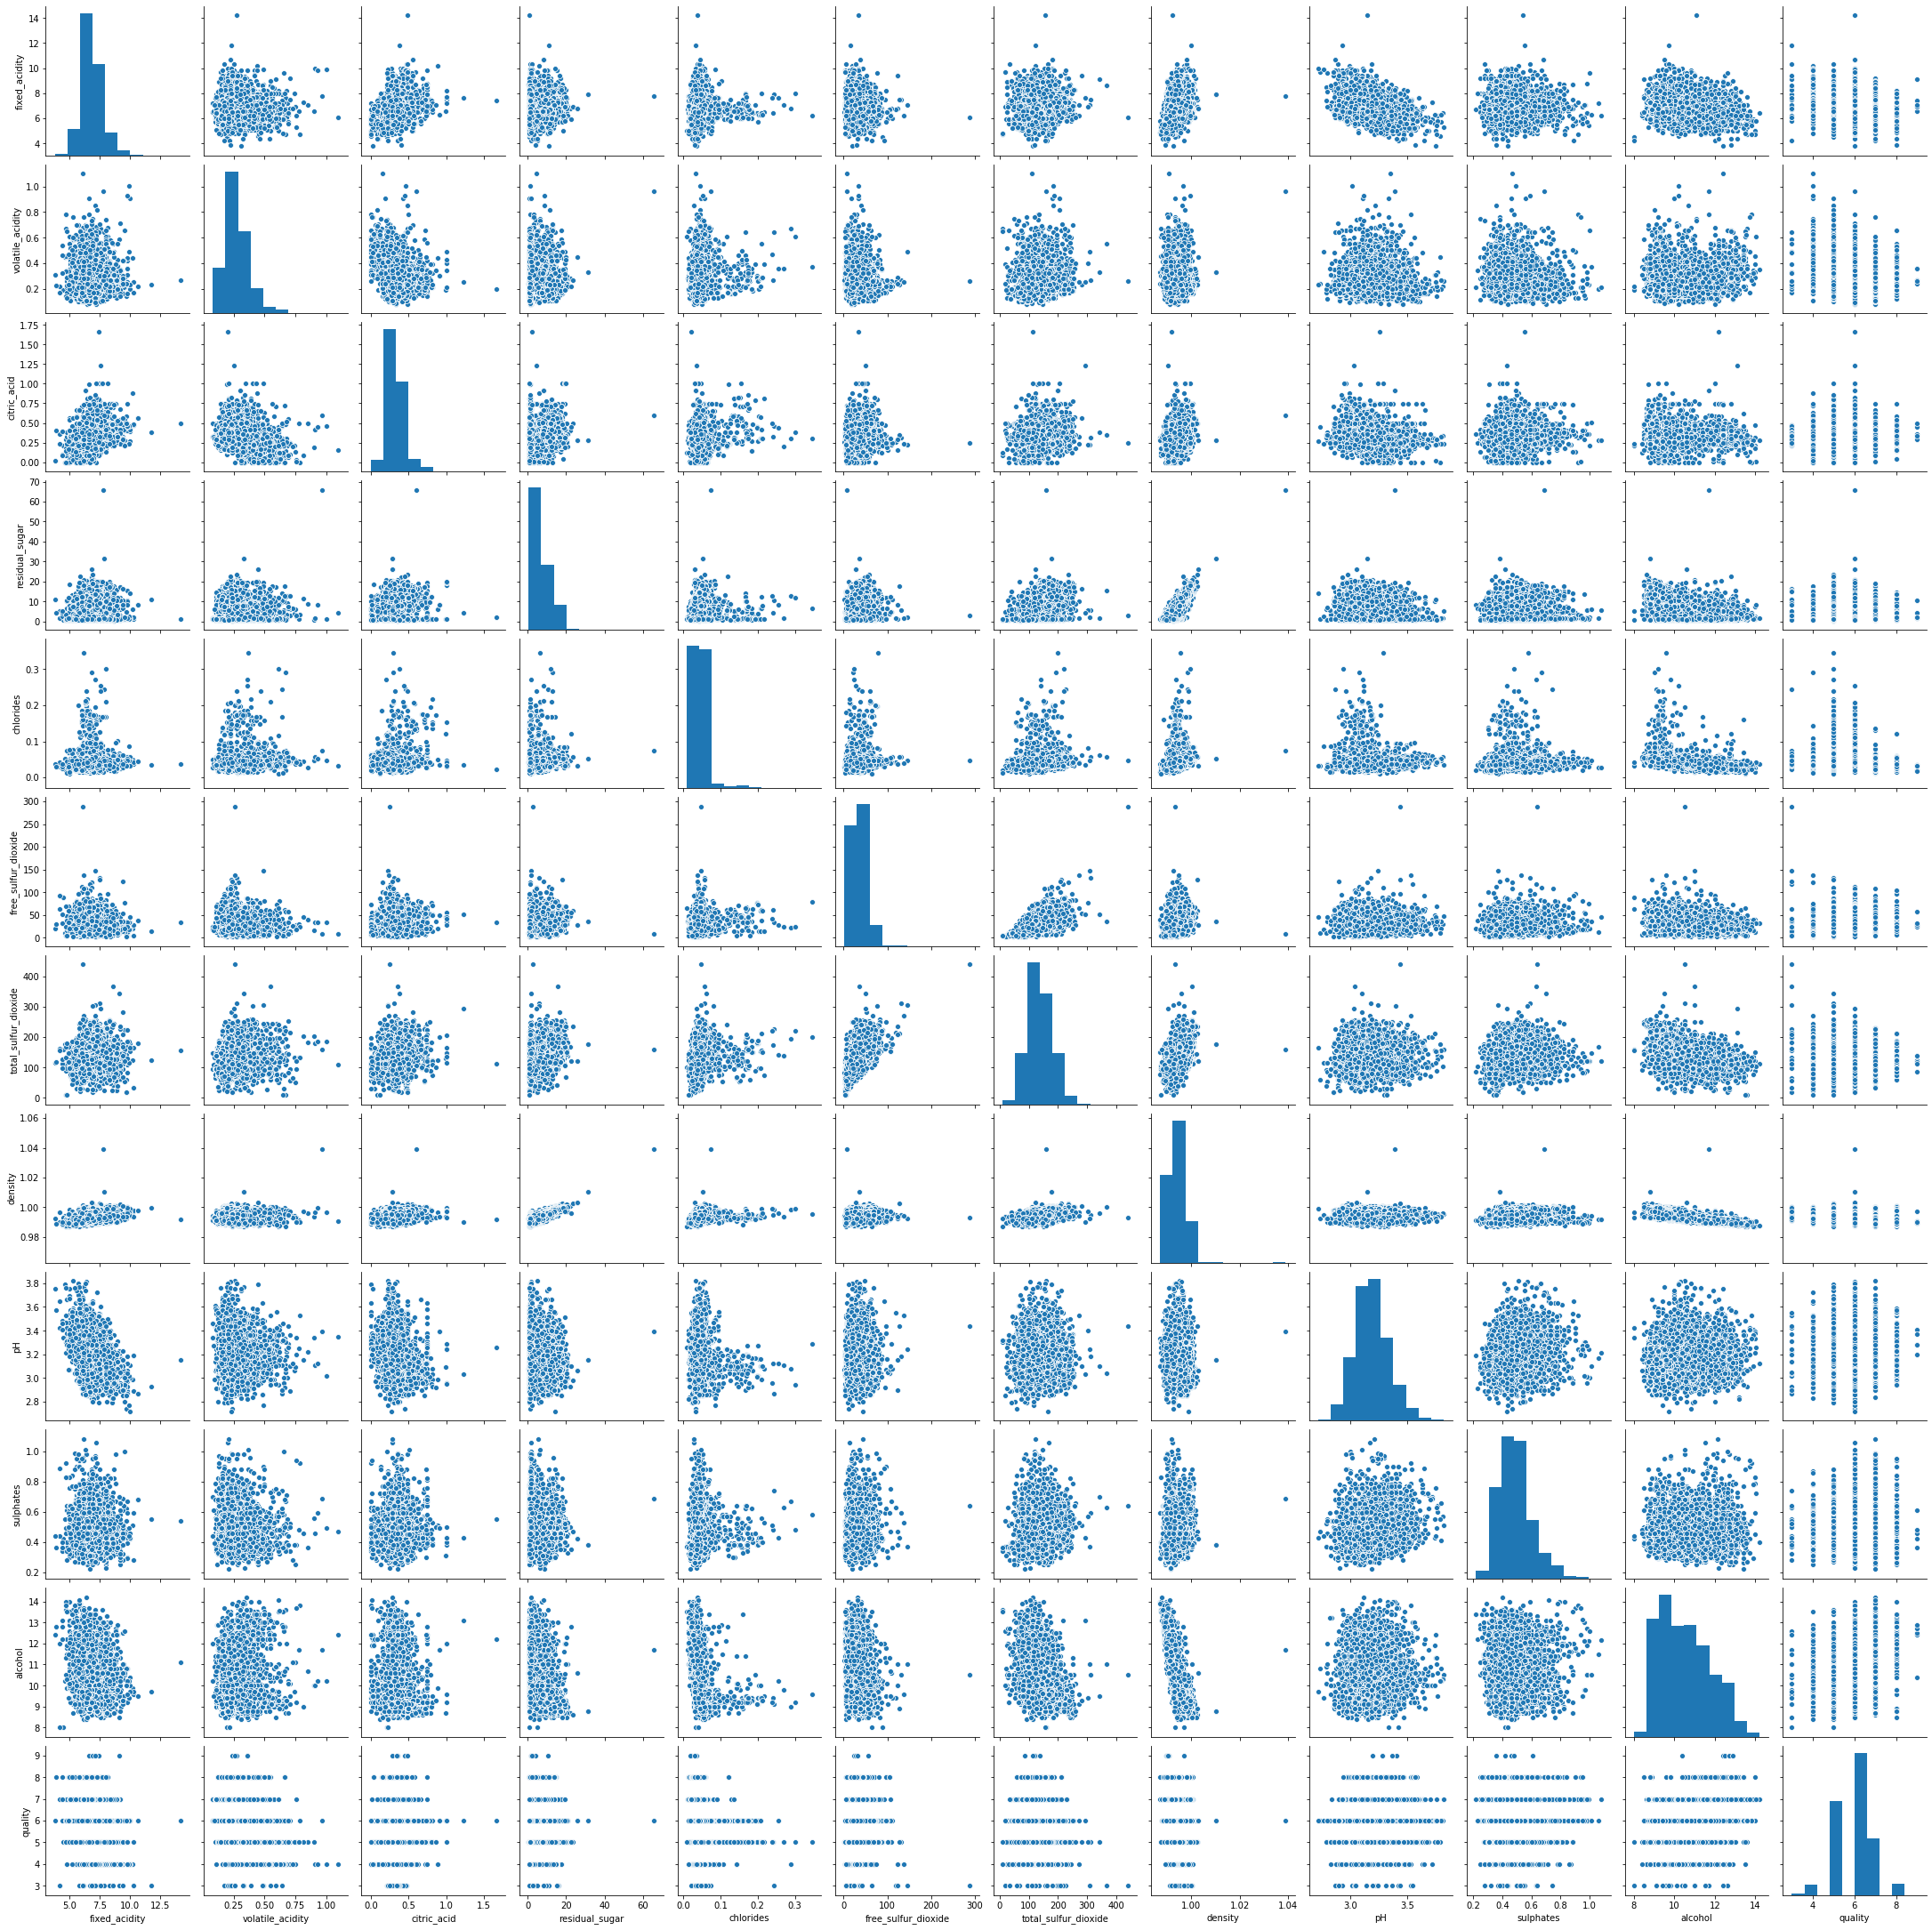

In [7]:
sn.pairplot(wine)

In [8]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual_sugar, dtype: float64


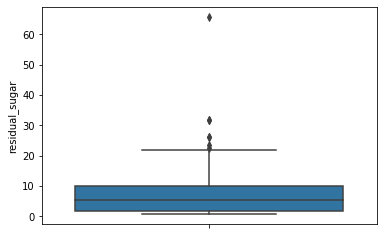

In [9]:
a = wine['residual_sugar'].describe()
print(a)
sn.boxplot('residual_sugar', data = wine, orient='v')

In [10]:
# a = wine['free_sulfur_dioxide'].describe()
# print(a)
# sn.boxplot('free_sulfur_dioxide', data = wine, orient='v' )

Text(0.5, 1.0, 'Density of data split in classes')

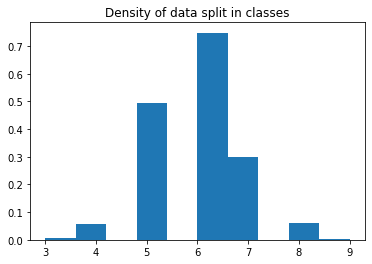

In [11]:
# wine.plot(kind="hist")
plt.hist(wine.quality, density=True)
plt.title("Density of data split in classes")

In [12]:
a = wine['total_sulfur_dioxide'].describe()
print(a)
# sn.boxplot('total_sulfur_dioxide', data = wine, orient='v' )

count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64


# Model

In [13]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

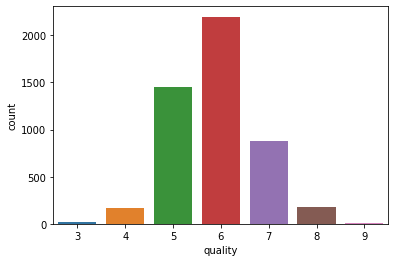

In [19]:
sn.countplot(y)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

C:\Users\Shri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lin_predict = model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, lin_predict)

array([[  1,   0,   3,   3,   0,   0],
       [  0,   0,  11,  21,   0,   0],
       [  0,   0, 105, 251,   2,   0],
       [  0,   0,  95, 446,   3,   0],
       [  0,   0,  27, 208,   6,   0],
       [  0,   0,   1,  40,   2,   0]], dtype=int64)

In [27]:
# % Accuracy
np.mean(lin_predict == y_test)

0.4555102040816327

In [28]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_true=y_test, y_pred=lin_predict))

              precision    recall  f1-score   support

           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00        32
           5       0.43      0.29      0.35       358
           6       0.46      0.82      0.59       544
           7       0.46      0.02      0.05       241
           8       0.00      0.00      0.00        43

    accuracy                           0.46      1225
   macro avg       0.39      0.21      0.21      1225
weighted avg       0.43      0.46      0.37      1225



In [ ]:
model.pre

# Improving the precision-recall

In [32]:
# wine.describe()

In [33]:
# a = wine['residual_sugar'].describe()
# print(a)
# sn.boxplot('residual_sugar', data = wine, orient='v')

In [34]:
# wine.shape

In [35]:
# a = wine['free_sulfur_dioxide'].describe()
# # print(a)
# sn.boxplot('free_sulfur_dioxide', data = wine, orient='v' )

In [36]:
# wine = wine[wine.free_sulfur_dioxide <= 90]

In [37]:
wine.shape

(4898, 12)

count    4898.000000
mean       35.308085
std        17.007137
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free_sulfur_dioxide, dtype: float64


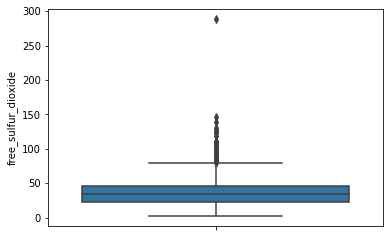

In [38]:
a = wine['free_sulfur_dioxide'].describe()
print(a)
sn.boxplot('free_sulfur_dioxide', data = wine, orient='v' )

count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64


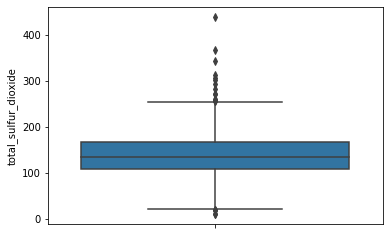

In [39]:
a = wine['total_sulfur_dioxide'].describe()
print(a)
sn.boxplot('total_sulfur_dioxide', data = wine, orient='v' )

In [40]:
# wine = wine[wine.total_sulfur_dioxide > 25]
# wine = wine[wine.total_sulfur_dioxide < 300]

In [41]:
wine.shape

(4898, 12)

# DecisionTreeClassifier

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn import preprocessing

In [43]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [44]:
X.shape

(4898, 11)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42);

In [46]:
# X_train = preprocessing.scale(X_train)

In [47]:
X_train.shape

(3673, 11)

In [48]:
rf_mod = RandomForestClassifier(criterion="entropy")
dt = DecisionTreeClassifier(criterion="entropy")

In [49]:
rf_mod.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
rf_mod.score(X_test, y_test)
dt.score(X_test, y_test)

0.6073469387755102

In [51]:
wine.shape

(4898, 12)

In [52]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [53]:
y_pred_rf = rf_mod.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [54]:
# % Accuracy after removing most of the outliers
print("Accuracy of RandomForestClassifier\n", np.mean(y_pred_rf == y_test))
print("\nAccuracy of Decision Tree model\n", np.mean(y_pred_dt == y_test))

Accuracy of RandomForestClassifier
 0.6873469387755102

Accuracy of Decision Tree model
 0.6073469387755102


In [58]:
print('\nrandom forest\n',classification_report(y_true=y_test, y_pred=y_pred_rf))
print('\ndecision tree\n',classification_report(y_true=y_test, y_pred=y_pred_dt))


random forest
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.64      0.22      0.33        32
           5       0.70      0.69      0.69       358
           6       0.66      0.79      0.72       544
           7       0.75      0.60      0.67       241
           8       0.94      0.35      0.51        43

    accuracy                           0.69      1225
   macro avg       0.61      0.44      0.49      1225
weighted avg       0.69      0.69      0.68      1225


decision tree
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.26      0.31      0.28        32
           5       0.64      0.62      0.63       358
           6       0.66      0.65      0.65       544
           7       0.58      0.60      0.59       241
           8       0.36      0.35      0.35        43
           9       0.00      0.00      0.00   